Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Ir

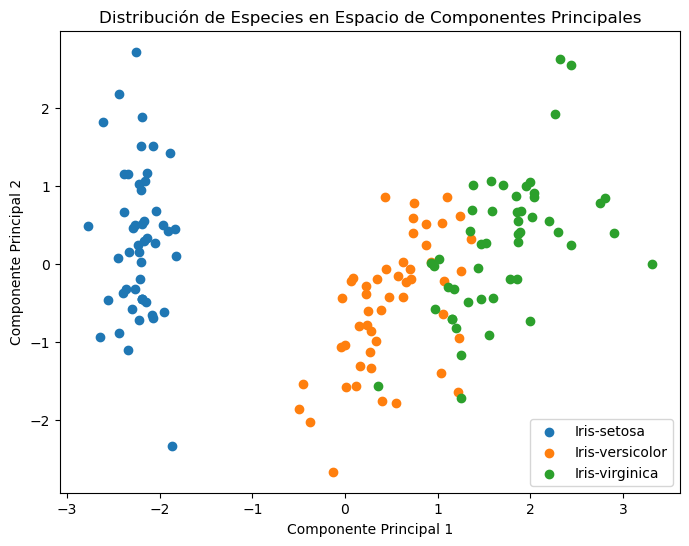

Coeficientes de Componentes Principales:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
Variabilidad Explicada:
[0.72770452 0.23030523]


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar dataset Iris
df = pd.read_csv('Iris.csv')

# Exploración y preprocesamiento
print("Información del dataset:")
print(df.info())
print(df.head())

# Normalización de datos
scaler = StandardScaler()
# Excluir columnas no numéricas (como 'Species') para la normalización
df_normalizado = scaler.fit_transform(df.drop(['Id', 'Species'], axis=1))

# Aplicación de PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_normalizado)

# Crear un nuevo DataFrame con los resultados de PCA y la columna 'Species'
pca_df = pd.DataFrame(pca_data, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Species'] = df['Species']

# Dibujar gráfico
plt.figure(figsize=(8, 6))
for especie in pca_df['Species'].unique():
    datos_especie = pca_df[pca_df['Species'] == especie]
    plt.scatter(
        datos_especie['Componente Principal 1'],
        datos_especie['Componente Principal 2'],
        label=especie
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Distribución de Especies en Espacio de Componentes Principales')
plt.legend()
plt.show()

# Análisis de coeficientes
print("Coeficientes de Componentes Principales:")
print(pca.components_)

# Variabilidad explicada
print("Variabilidad Explicada:")
print(pca.explained_variance_ratio_)
